<a href="https://colab.research.google.com/github/RAVIKUMARBALIJA/tensorflow2_tutorials/blob/main/WrittenDigit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU,Flatten,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
checklist=['CPU','GPU']
for device in checklist:
  info=tf.config.list_physical_devices(device)
  if info:
    print(f"{device} is available")
    print(f"details \ {info}")
  else:
    print(f"{device} is not available")

CPU is available
details \ [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is available
details \ [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
mnist=tf.keras.datasets.mnist

In [9]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [10]:
x_train_full.shape

(60000, 28, 28)

In [11]:
"""x_val=x_train_full[:5000]
y_val=y_train_full[:5000]
x_train=x_train_full[5000:]
y_train=y_train_full[5000:]
"""

'x_val=x_train_full[:5000]\ny_val=y_train_full[:5000]\nx_train=x_train_full[5000:]\ny_train=y_train_full[5000:]\n'

In [20]:
x_val,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_val,y_train=y_train_full[:5000],y_train_full[5000:]

x_test=x_test/255.

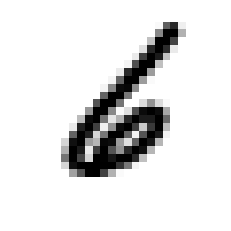

In [13]:
plt.imshow(x_val[999],cmap='binary')
plt.axis('off')
plt.show()

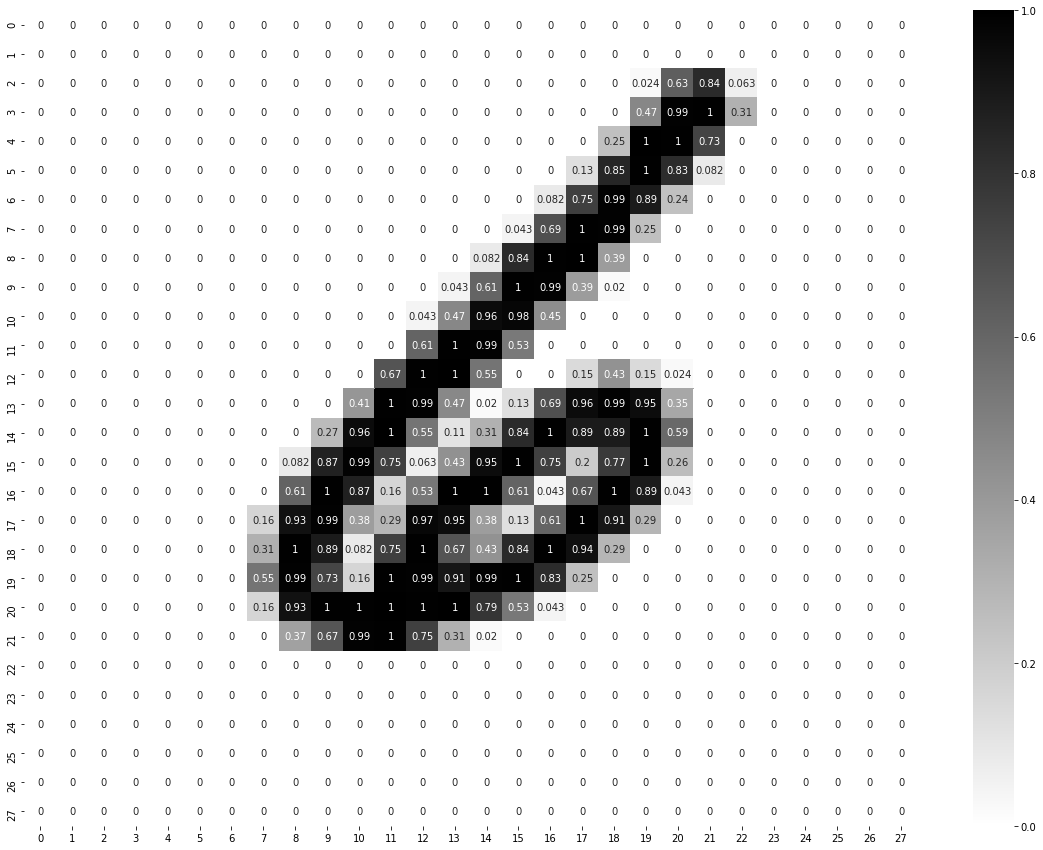

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(x_val[999],annot=True,cmap='binary')

In [15]:
def buildModel(optimizer='adam',dropout=False,dropout_rate=0.25,weight_regularizer='l2',activation_func='relu'):
  input=Input(shape=(28,28),name='inputlayer')
  y=Flatten()(input)
  y=Dense(500,activation=activation_func,name='hidden1',kernel_regularizer=weight_regularizer)(y)
  if dropout:
    y=Dropout(rate=dropout_rate,)(y)
  y=Dense(300,activation=activation_func,name='hidden2',kernel_regularizer=weight_regularizer)(y)
  if dropout:
    y=Dropout(rate=dropout_rate,)(y)
  y=Dense(100,activation=activation_func,name='hidden3',kernel_regularizer=weight_regularizer)(y)
  if dropout:
    y=Dropout(rate=dropout_rate)(y)
  output=Dense(10,activation=tf.nn.softmax,name="output")(y)
  model=Model(input,output,name=optimizer)
  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  print(model.summary())
  return model

In [16]:
def train_model(model_obj,epochs=30):
  history=model_obj.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))
  return pd.DataFrame(history.history)

In [17]:
def plot_metrics(data,model_obj):
  data.plot(figsize=(8,5))
  plt.title(model_obj.name)
  plt.grid(True)
  plt.show()

In [18]:
adam_model=buildModel()

Model: "adam"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (InputLayer)      [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 500)               392500    
_________________________________________________________________
hidden2 (Dense)              (None, 300)               150300    
_________________________________________________________________
hidden3 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
________________________________________________________

In [21]:
metrics=train_model(adam_model)

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 2.2275 - accuracy: 0.8540 - val_loss: 0.6578 - val_accuracy: 0.9082
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6204 - accuracy: 0.9153 - val_loss: 0.5215 - val_accuracy: 0.9374
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5290 - accuracy: 0.9293 - val_loss: 0.4644 - val_accuracy: 0.9424
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4749 - accuracy: 0.9381 - val_loss: 0.4268 - val_accuracy: 0.9468
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4422 - accuracy: 0.9401 - val_loss: 0.4070 - val_accuracy: 0.9492
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4217 - accuracy: 0.9423 - val_loss: 0.3791 - val_accuracy: 0.9542
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4022 - accuracy: 0.9451 - val_loss: 0.3915 - val_accuracy:

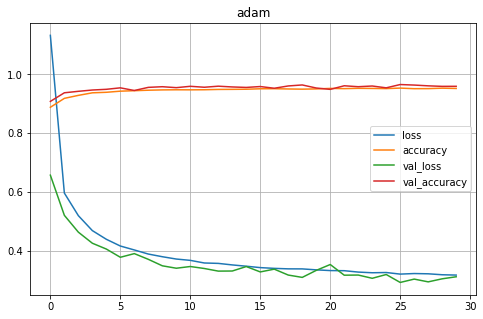

In [23]:
plot_metrics(metrics,adam_model)